In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('CarPrice_Assignment.csv')

data=data.drop(['car_ID','CarName'],axis=1)
data=pd.get_dummies(data,drop_first=True)


In [9]:
#split data

X=data.drop('price',axis=1)
Y=data['price']
X_train,X_test,Y_train,Y_test=train_test_split = train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
#create & train model

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [11]:
#evaluate with cross validation 
print('Name:Rosetta Jenifer C')
print('Reg No: 212225230230')
print("\n=== Cross-Validation ===")
cv_scores = cross_val_score(model,X,Y,cv=5)
print("Fold R2 scores:",[f"{score:.4f}" for score in cv_scores])
print(f"Average R2: {cv_scores.mean():.4f}")

Name:Rosetta Jenifer C
Reg No: 212225230230

=== Cross-Validation ===
Fold R2 scores: ['0.6238', '0.6316', '0.3132', '0.3643', '-0.4944']
Average R2: 0.2877


In [18]:
Y_pred = model.predict(X_test)

print("\n=== Test Set Performance ===")
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print('R2 Score =', r2_score(Y_test, Y_pred))


=== Test Set Performance ===
MSE: 8482008.484371515
MAE: 2089.38272920472
R2 Score = 0.8925566700320282


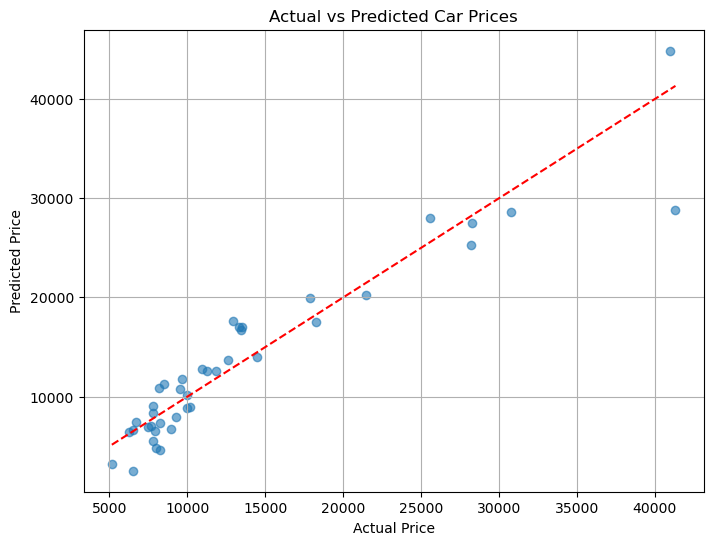

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()],'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()